<a href="https://colab.research.google.com/github/pshemach/Bank-Churn-Prediction/blob/main/Bank_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Bank Churn Prediction***

#**Import Libaries**

In [ ]:
pip install imblearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from imblearn.over_sampling import SMOTE
import tensorflow as tf

%matplotlib inline

#**Loading Data**

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.shape

(10000, 14)

#**Exploratory Data Analysis**

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print(f'Columns of the dataframe: {df.shape[1]}')
print(f'Raws of the dataframe: {df.shape[0]}')

Columns of the dataframe: 14
Raws of the dataframe: 10000


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [ ]:
print("Null the null value count:")
df.isnull().sum()

Null the null value count:


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
print(f'Duplicated label count:',df.duplicated().sum())

Duplicated label count: 0


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
categorical_features = ['Geography','Gender','HasCrCard','IsActiveMember']
numerical_features = ['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']

In [ ]:
df[numerical_features].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [ ]:
mapping = {0:"No", 1:"Yes"}
df['HasCrCard'] = df['HasCrCard'].map(mapping)
df['IsActiveMember'] = df['IsActiveMember'].map(mapping)
df['Exited'] = df['Exited'].map(mapping)

In [ ]:
def show_countplot(x, data=df, figsize=(5,3), hue=None, palette='coolwarm',title=None):
  plt.figure(figsize=figsize)
  sns.countplot(data, x=x, hue=hue, palette=palette)
  plt.title(title)
  plt.show();

<ipython-input-173-fdedb30d8d8a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x=x, hue=hue, palette=palette)


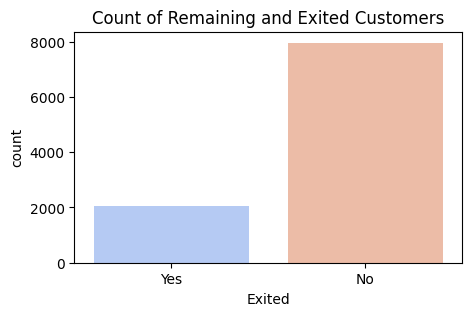

In [ ]:
show_countplot(x='Exited', title="Count of Remaining and Exited Customers")

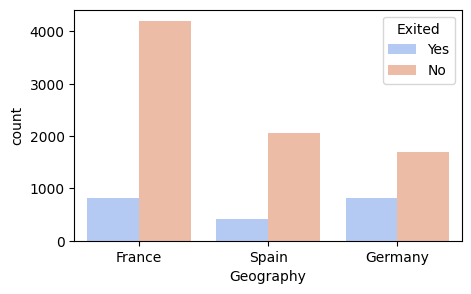

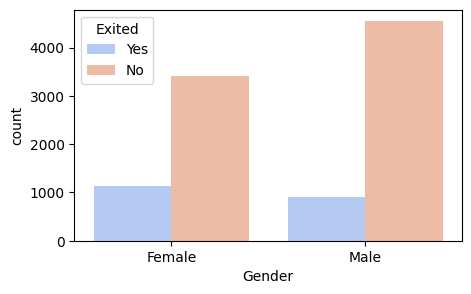

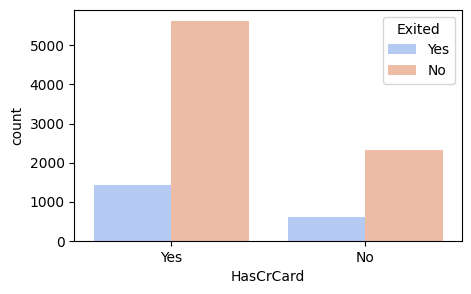

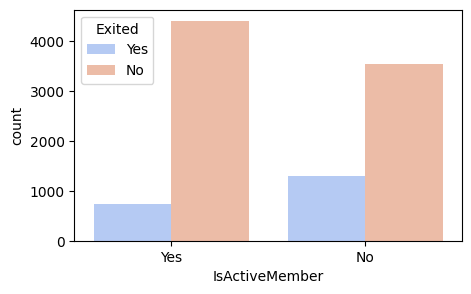

In [ ]:
for feature in categorical_features:
  show_countplot(x=feature, hue='Exited')

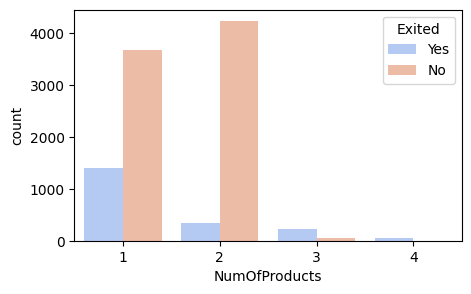

In [ ]:
show_countplot(x='NumOfProducts', hue="Exited",palette='coolwarm')

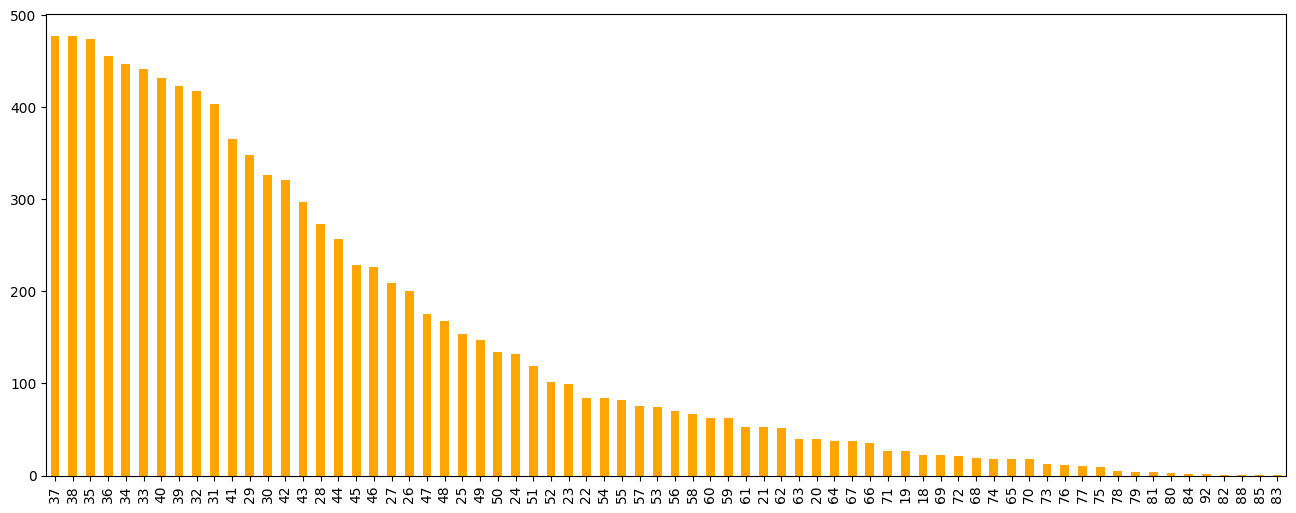

In [ ]:
plt.figure(figsize=(16,6))
df['Age'].value_counts().plot(kind='bar', color='orange')
plt.show()

In [ ]:
def show_stacked_bar(df,group,target):
  temp_df = df.groupby([group,target]).size().reset_index().pivot(columns=target, index=group, values=0)
  ax = temp_df.plot(kind='bar', stacked=True, colormap='coolwarm')
  ax.set_xlabel(group)
  ax.set_ylabel('Count')
  ax.set_title(f'Stacked Bar Plot of {target} by {group}')
  plt.show()

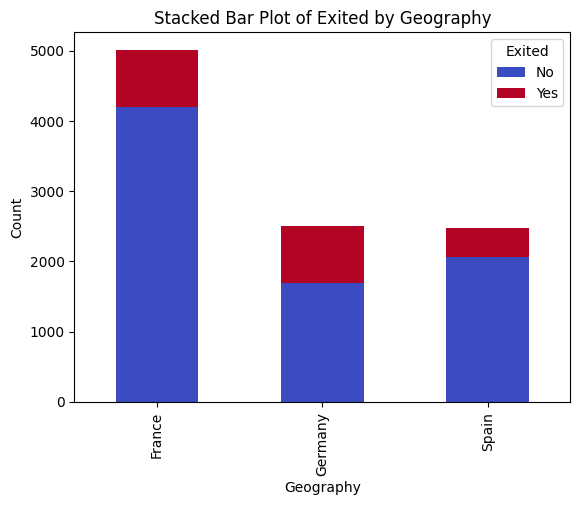

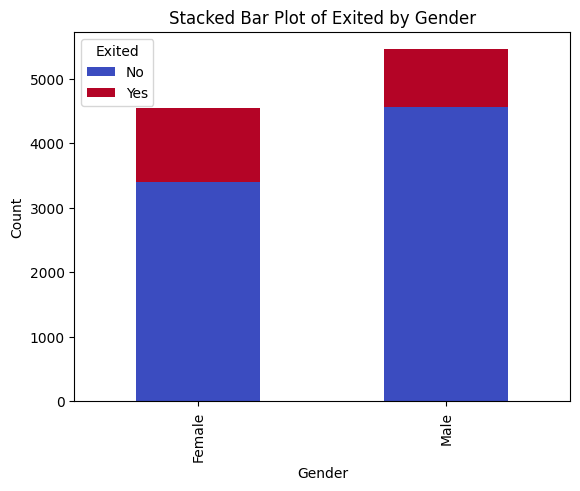

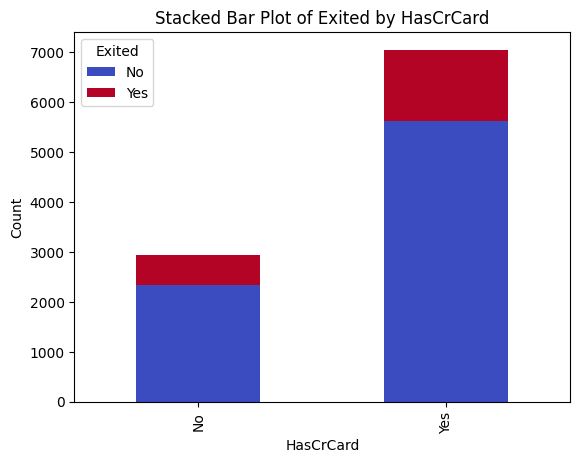

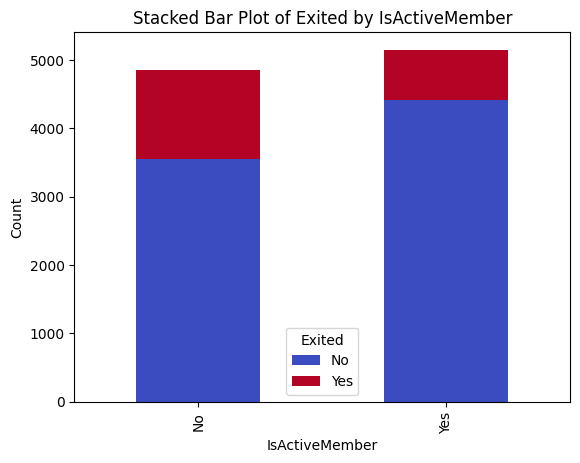

In [ ]:
for feature in categorical_features:
  show_stacked_bar(df,feature,'Exited')

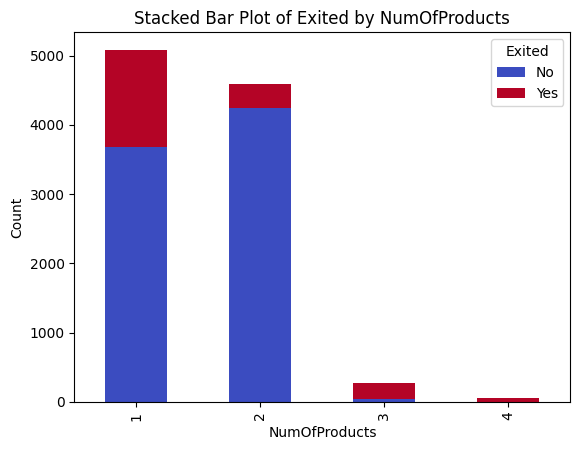

In [ ]:
show_stacked_bar(df,'NumOfProducts','Exited')

In [ ]:
def show_kdeplot(feature,data=df, hue='Exited'):
  g = sns.FacetGrid(data, hue=hue, aspect=3, palette='coolwarm')
  g.map(sns.kdeplot, feature, fill=True)
  g.set(xlim=(0, df[feature].max()))
  plt.title(f'Distribution of {feature} with {hue}')
  g.add_legend()
  plt.show()

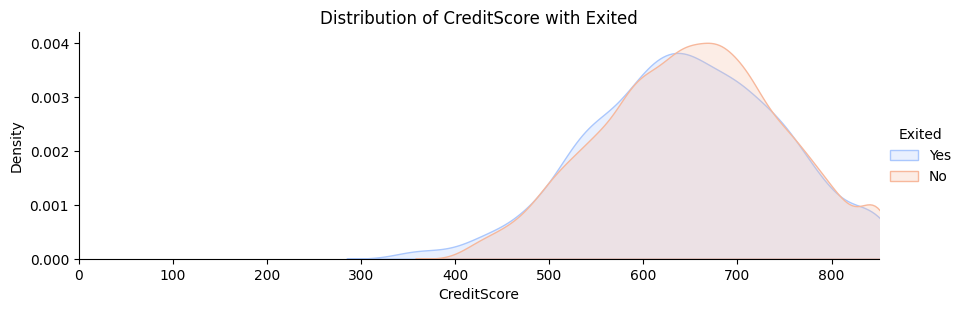

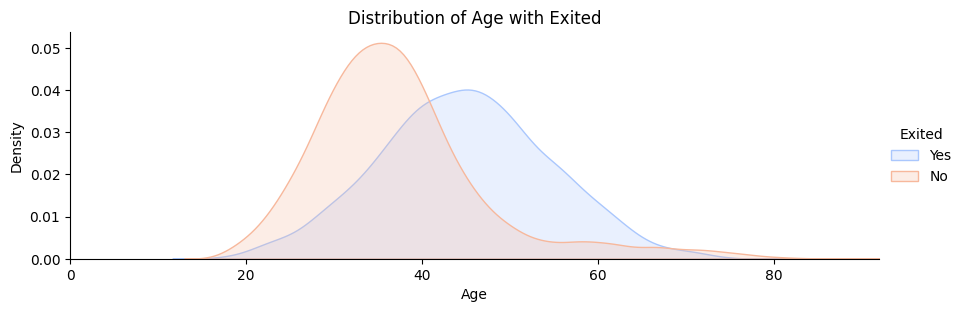

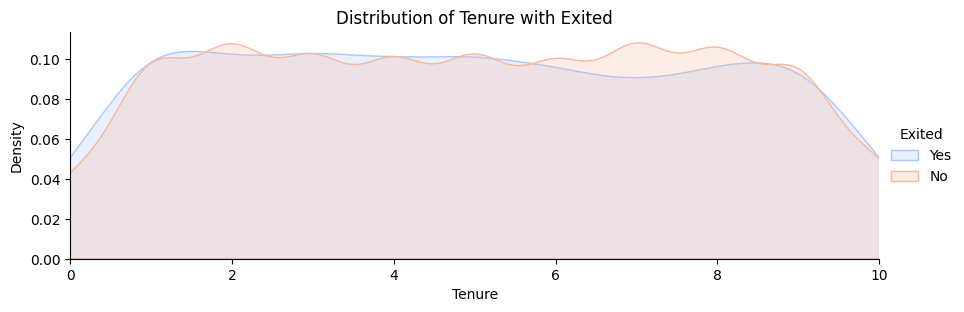

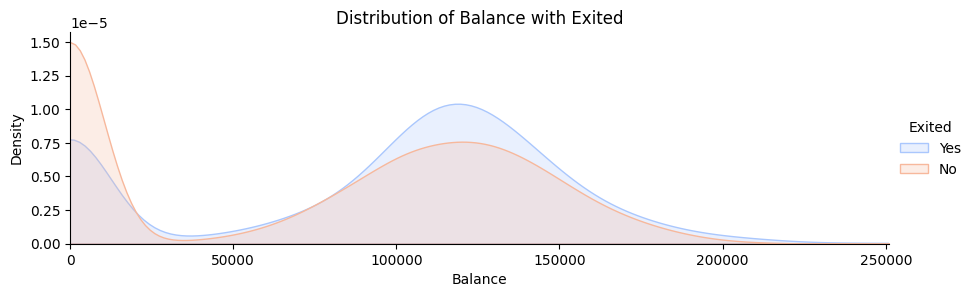

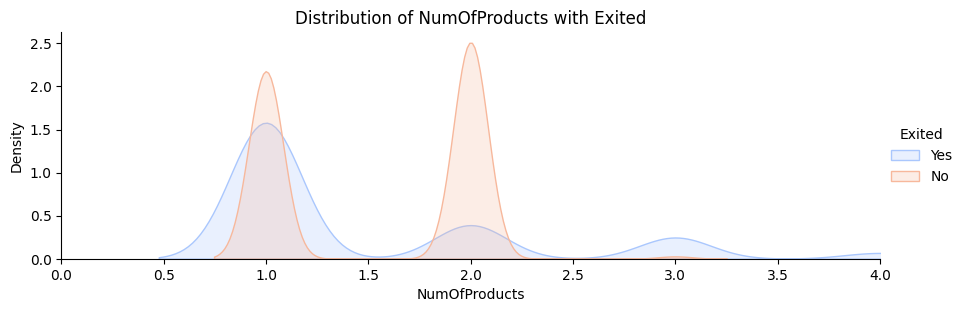

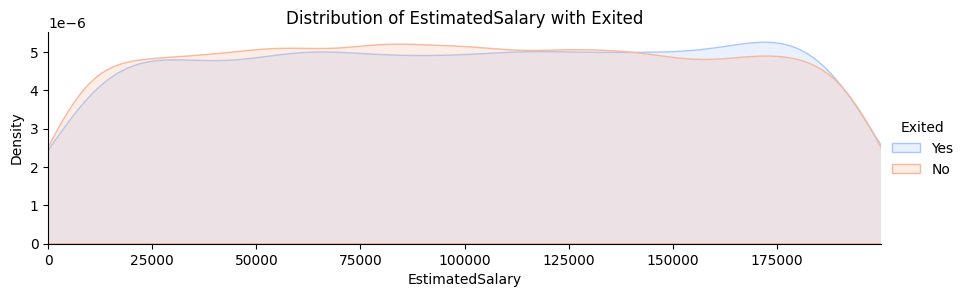

In [ ]:
for feature in numerical_features:
  show_kdeplot(feature)

In [ ]:
def show_histplot(x, data=df, hue=None):
  sns.histplot(data, x=x, hue=hue,palette='coolwarm', kde=True)
  plt.show()

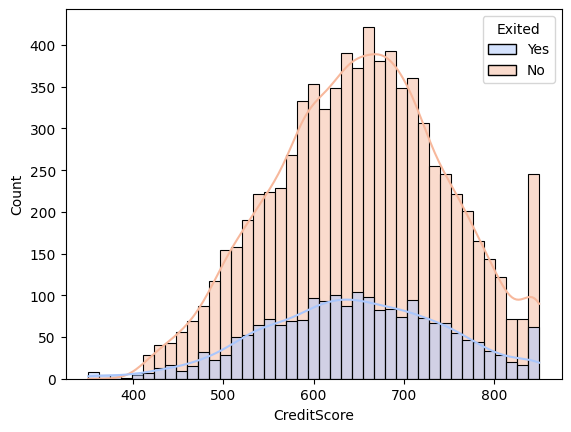

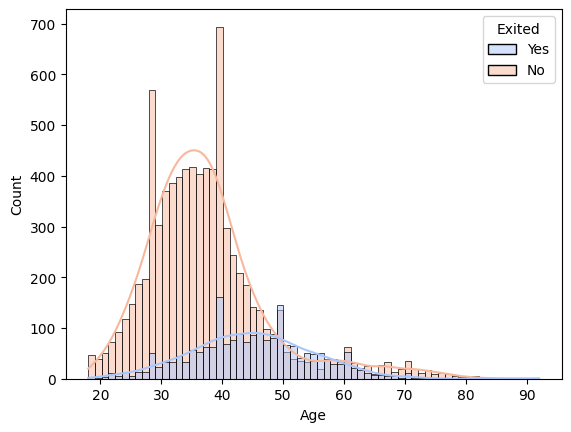

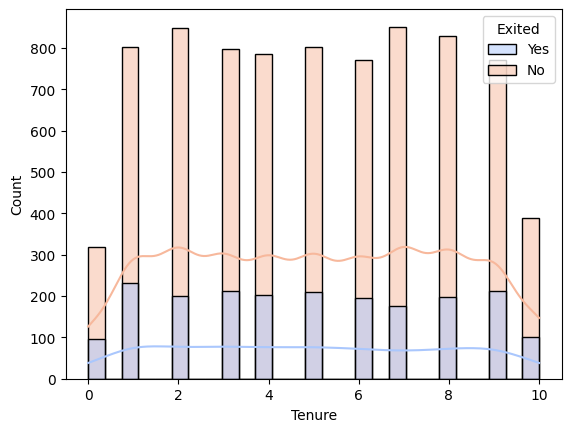

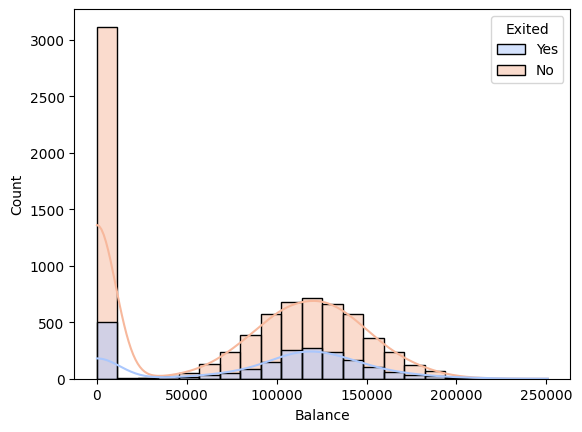

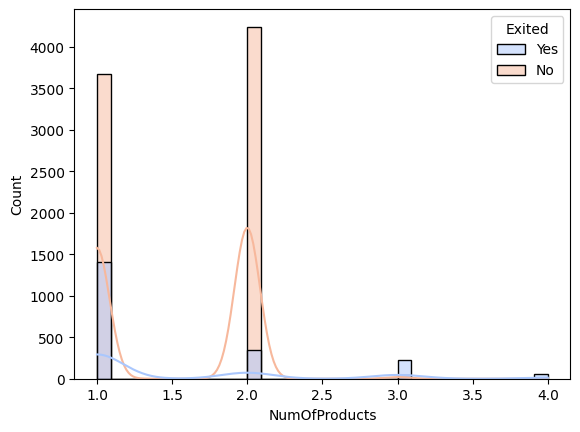

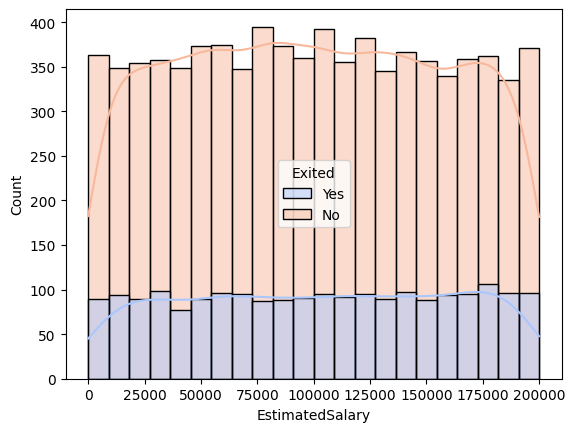

In [ ]:
for feature in numerical_features:
  show_histplot(x=feature, hue='Exited')

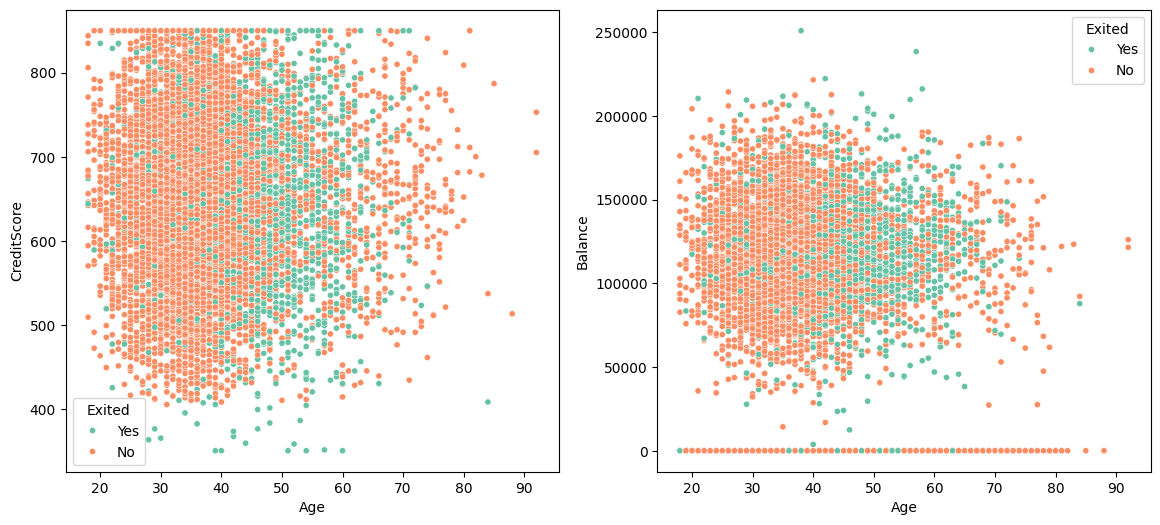

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(data = df, x="Age", y='CreditScore', hue='Exited' ,ax = ax[0], s=20, palette='Set2')
sns.scatterplot(data = df, x="Age", y='Balance', hue='Exited', ax = ax[1], s=20, palette='Set2')
plt.show()

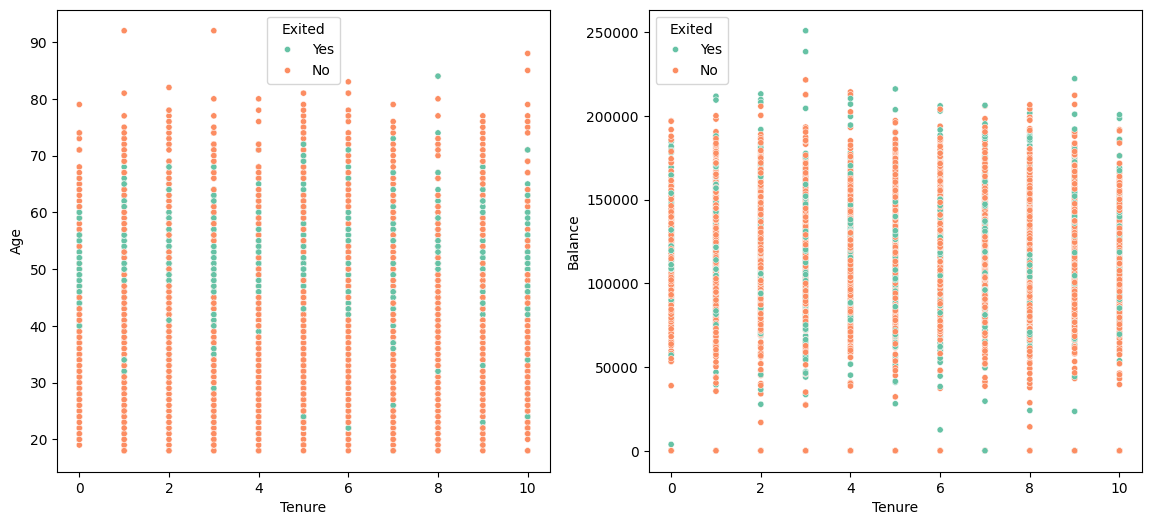

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(data = df, x='Tenure', y='Age', hue='Exited' ,ax = ax[0], s=20, palette='Set2')
sns.scatterplot(data = df, x='Tenure', y='Balance', hue='Exited', ax = ax[1], s=20, palette='Set2')
plt.show()

In [ ]:
mapping = {"No":0, "Yes":1}
df['HasCrCard'] = df['HasCrCard'].map(mapping)
df['IsActiveMember'] = df['IsActiveMember'].map(mapping)
df['Exited'] = df['Exited'].map(mapping)

<ipython-input-76-3180657ae3c8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")


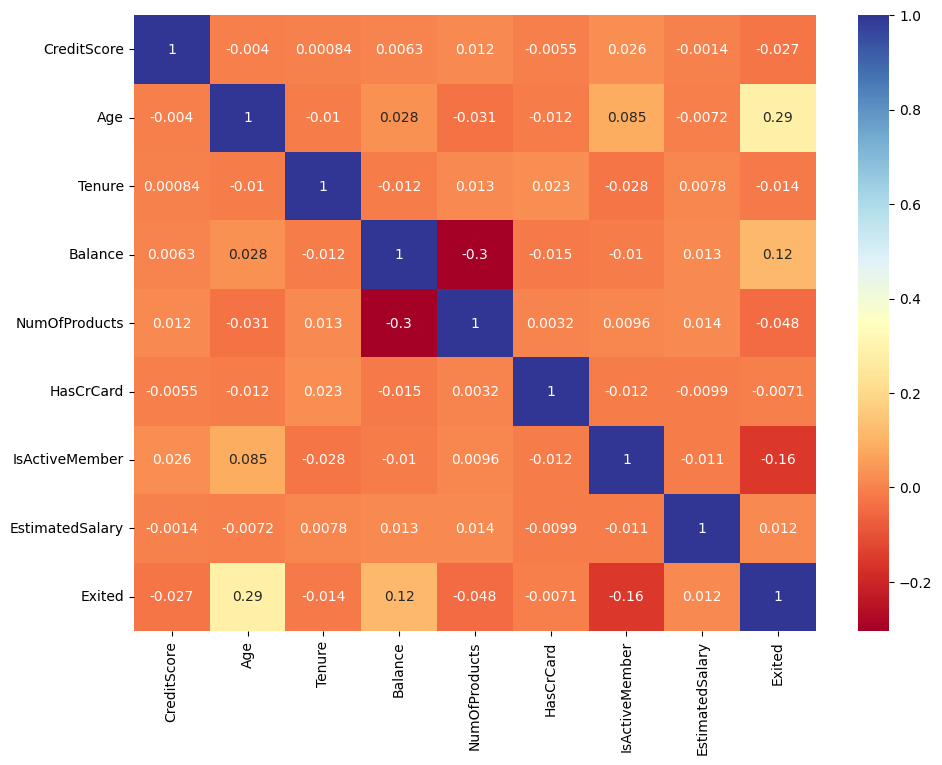

In [ ]:
plt.subplots(figsize=(11,8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.xticks(rotation=90)
plt.show()

#***Data PreProcessing***

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data = pd.get_dummies(df, drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(data.drop(['Exited'], axis=1))
scaled_features = scaler.transform(data.drop(['Exited'], axis=1))

#***Feature Selection***

In [ ]:
X = scaled_features
y = data['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#Over sampling imbalanced data set
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

#***Model Training***

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [ ]:
y_train_resampled.value_counts()

0    6356
1    6356
Name: Exited, dtype: int64

In [ ]:
models = {}

from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

from xgboost import XGBClassifier
models["XGBoost"] = XGBClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy, precision, recall, f1 ={},{},{},{}

In [ ]:
for key in models.keys():

    models[key].fit(X_train_resampled, y_train_resampled)

    prediction = models[key].predict(X_test)

    accuracy[key] = accuracy_score(prediction,y_test)
    precision[key] = precision_score(prediction,y_test)
    recall[key] = recall_score(prediction,y_test)
    f1[key] = f1_score(prediction,y_test)

In [ ]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy','Precision','Recall','F1'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1'] = f1.values()
df_model

,Accuracy,Precision,Recall,F1
Logistic Regression,0.7210,0.709924,0.385892,0.500000
Decision Trees,0.7720,0.541985,0.435583,0.482993
Random Forest,0.8400,0.587786,0.593830,0.590793
Naive Bayes,0.7340,0.702290,0.399421,0.509225
K-Nearest Neighbor,0.7425,0.643766,0.402866,0.495593
XGBoost,0.8515,0.557252,0.640351,0.595918


In [ ]:
tf.random.set_seed(42)
dl_model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,'relu'),
    tf.keras.layers.Dense(25,'relu'),
    tf.keras.layers.Dense(25,'relu'),
    tf.keras.layers.Dense(1,'sigmoid')
])

dl_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                  optimizer = tf.keras.optimizers.Adam(lr=0.01),
                  metrics=['accuracy'])

dl_model.fit(X_train_resampled, y_train_resampled, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
398/398 [==============================] - 2s 3ms/step - loss: 0.5412 - accuracy: 0.7233 - val_loss: 0.4584 - val_accuracy: 0.7785
Epoch 2/10
398/398 [==============================] - 1s 3ms/step - loss: 0.4448 - accuracy: 0.7894 - val_loss: 0.4319 - val_accuracy: 0.7940
Epoch 3/10
398/398 [==============================] - 1s 3ms/step - loss: 0.4256 - accuracy: 0.8000 - val_loss: 0.5006 - val_accuracy: 0.7415
Epoch 4/10
398/398 [==============================] - 1s 2ms/step - loss: 0.4150 - accuracy: 0.8074 - val_loss: 0.4939 - val_accuracy: 0.7510
Epoch 5/10
398/398 [==============================] - 1s 2ms/step - loss: 0.4038 - accuracy: 0.8133 - val_loss: 0.4630 - val_accuracy: 0.7700
Epoch 6/10
398/398 [==============================] - 1s 2ms/step - loss: 0.3974 - accuracy: 0.8163 - val_loss: 0.4407 - val_accuracy: 0.7915
Epoch 7/10
398/398 [==============================] - 1s 2ms/step - loss: 0.3897 - accuracy: 0.8189 - val_loss: 0.4294 - val_accuracy: 0.8085
Epoch 

In [ ]:
y_pred_dl_model = dl_model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
y_pred_dl_model_binary = [[0] if i <0.5 else [1] for i in y_pred_dl_model]

In [ ]:
dl_model_metrics = {'Accuracy': accuracy_score(y_pred_dl_model_binary,y_test),
                    'Precision':precision_score(y_pred_dl_model_binary,y_test),
                    'Recall':recall_score(y_pred_dl_model_binary,y_test),
                    'F1': f1_score(y_pred_dl_model_binary,y_test)}

In [ ]:
df_model.loc['DL Model'] = dl_model_metrics

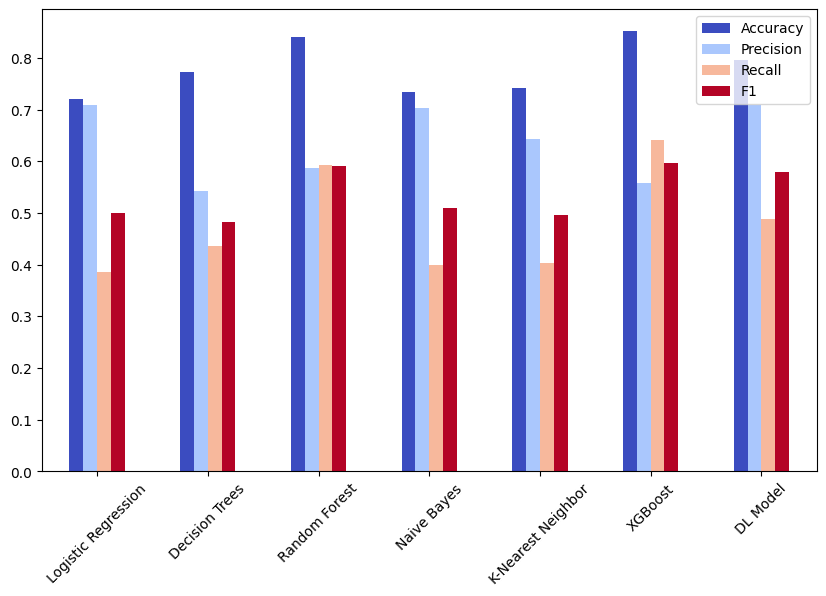

In [ ]:
df_model.plot(figsize=(10,6),rot=45, kind='bar', colormap='coolwarm')
plt.show()